# Chapter 1: Characterizing Seasonal Rainfall Variability <a name="top"></a>

<div class="alert alert-info">
 [⬅️ Previous Chapter](Chapter%200.ipynb)     [➡️ Next Chapter](Chapter%202.ipynb)
</div>

![](../assets/kenya_landscape.png)

Rainfall in many dryland ecosystems exhibits pronounced variability from year to year. In this excercise, we will investigate the nature of rainfall at some locations in Kenya and use these data to draw inference into the nature of the rainfall process. In the next chapter, we will use rainfall data to develop an empirical model of rainfall that we could use to simulate the rainfall process across many realizations of discrete growing seasons. 


## Chapter Objectives

* Analyze daily rainfall at monthly, seasonal, and yearly scales
* Examine the nature of the daily rainfall process
* Plot key results and compare findings across stations and over time.

First, let's load pandas into our notebook. We use `pd` as the shortname for pandas, which is an informal convention that you will see used across the python data analysis landscape. We use `np` as the shortname for `numpy`. 

<div class="alert alert-warning">
**NOTE: You only need to run the next cell once per session.**
</div>

In [542]:
import pandas as pd
import numpy as np

## Reading in the data

All the data for our excercise are stored as `.csv` files. These files are very easy to import into pandas. We read the `.csv` file into a `dataframe`, which is the fundamental unit of storage and analysis pandas. The `dataframe` is similar to `R` dataframes, and can even be thought of as a spreadsheet. Every dataframe contains columns (variables) and rows (values).

In [543]:
df = pd.read_csv("../data/mpala_ranch_house_rainfall.csv")

#### What just happened: 
Our `.csv` file was just imported by pandas and stored in a pandas dataframe, which we called `df` (another common shorthand in the pandas world). The resulting `df` object will allow us to do all sorts of analysis and manipulations of the data, just as if we had loaded the data into a spreadsheet in Excel. 

If you're not familiar, this would be a good time to check out a pandas tutorial, which is available in [Chapter 0](Chapter 0.ipynb) of this module.

<div class="alert alert-info">
The **info()** command provides a quick summary of our dataframe's contents.
</div>

In [544]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16602 entries, 0 to 16601
Data columns (total 5 columns):
Rainfall (mm)    16602 non-null float64
Date             16602 non-null object
Year             16602 non-null int64
Month            16602 non-null int64
Day              16602 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 648.6+ KB


Here we see that the dataframe has 16,602 entries (this is the number of rows in the `.csv` file), and contains 5 columns that are called `Rainfall (mm)`, `Date`, `Year`, `Month`, and `Day`. These column names are taken directly from the `.csv` header row.

Pandas has auto-detected that `Year` is an integer and the data in the `Rainfall (mm)` column are detected to be floating point numbers. However, `Month` and `Day`, which should also be integers have been classified as `float64`, while the `Date` column has been categorized as an indeterminant `object` type (this is the default type, which means pandas has no idea what to do with this column). We will come back to this in a bit, but first let's keep exploring our new dataframe.


<div class="alert alert-info">Let's take a look at the first few rows of the dataframe using the **head()** command.</div>

In [545]:
df.head()

,Rainfall (mm),Date,Year,Month,Day
0,0.0,1/1/72,1972,1,1
1,0.0,1/2/72,1972,1,2
2,0.0,1/3/72,1972,1,3
3,0.0,1/4/72,1972,1,4
4,0.0,1/5/72,1972,1,5


We see the four columns of data we expect to see, plus an additional _Index column_ that is zero-indexed on the far left. This index column is automatically added by pandas to every dataframe. Later on, we will see how to specify the index column contents.

The **info()** command reports the columns and datatypes in a dataframe, and the **head()** command provides the first few rows of values. 

<div class="alert alert-info">The **describe()** command provides a simple statistical summary of our dataframe.</div>

In [546]:
df.describe()

,Rainfall (mm),Year,Month,Day
count,16602.000000,16602.000000,16602.000000,16602.000000
mean,-511.073972,1994.226659,6.490363,15.722142
std,2205.446768,13.125175,3.450520,8.800711
min,-9999.000000,1972.000000,1.000000,1.000000
25%,0.000000,1983.000000,3.000000,8.000000
50%,0.000000,1994.000000,6.000000,16.000000
75%,0.000000,2006.000000,9.000000,23.000000
max,190.500000,2017.000000,12.000000,31.000000


The **describe()** function has provided summaries of each of our columns. We see that something is amiss in the `Rainfall (mm)` column; the minimum value is `-9999` and the mean value is less than zero! It looks like we have some things to sort out before we proceed.

## Cleaning up our data

If building a boat is a "bit of construction followed by a ton of sanding", then conducting data analysis is usually a "ton of cleaning followed by a bit of analysis". While it's tempting to hide this process from you during this module, it's helpful to learn a little about how to clean up data. 

The first thing we want to do is reassign the `-9999` values of rainfall to `nan`, which means "not a number", which will cause `pandas` to ignore them in all of its calculations. 

To do this, we use the **replace()** function to swap all the locations in the `df['Rainfall (mm)']` column that contain `-9999` with `np.nan`. Because the default operation of the **replace()** command is to return a _copy_ of the transformed data, we use the `inplace=True` argument to force the changes to happen inside our original `df` object. This all gets done in the following one-liner:

In [547]:
df['Rainfall (mm)'].replace(-9999, np.nan, inplace=True)

We can check to see if the values of `Rainfall (mm)` are updated using the **describe()** function:

In [548]:
df.describe()

,Rainfall (mm),Year,Month,Day
count,15751.000000,16602.000000,16602.000000,16602.000000
mean,1.542690,1994.226659,6.490363,15.722142
std,5.942004,13.125175,3.450520,8.800711
min,0.000000,1972.000000,1.000000,1.000000
25%,0.000000,1983.000000,3.000000,8.000000
50%,0.000000,1994.000000,6.000000,16.000000
75%,0.000000,2006.000000,9.000000,23.000000
max,190.500000,2017.000000,12.000000,31.000000


<<< ----SNIP---- >>>

Next, we want to clean up the column types so they correspond to what we know them to be. First, let's deal with the `Day` and `Month` columns. Let's use the **unique()** function to inspect the `Month` column.

<div class="alert alert-info">**unique()** is a very useful function that provides a list of all the unique values of a dataframe column.</div> 

In pandas, we can refer to specific columns of a dataframe using the name of the column (e.g. `df['Month']`). We can see all the unique values of the `Month` column with the following command:

In [549]:
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

The pandas dataframe object has a ton of helpful functions. We've already seen **info()**, and **head()**, and **describe()** which are used to provide summaries of the data, as well as **unique()**. A quick `dir(df)` reveals some of what might else be possible.

<div class="alert alert-info">Use the **dir()** command to inspect any object in python and see what methods and attributes it might have</div>

In [550]:
print(dir(df))

['Date', 'Day', 'Month', 'T', 'Year', '_AXIS_ALIASES', '_AXIS_IALIASES', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '_AXIS_SLICEMAP', '__abs__', '__add__', '__and__', '__array__', '__array_wrap__', '__bool__', '__bytes__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmatmul__

Ok. That's a _ton_ of functions. We won't possibly cover all of them, and you could use `pandas` for a very long time before you use them all. Let's look at some of the most important.

## Groupby - aggregation in pandas

The most common - but not always the most helpful - interval of rainfall characterization is annual. Let's see what years we have available to investigate annual rainfall, using the **unique()** function.

In [551]:
df['Year'].unique()

array([1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017])

It looks like we have almost five decades of rainfall data. The first thing we might want to do with this data is look at yearly summaries. 

Tucked away in the list returned by the **dir()** command is the **groupby()** function, which is one of the most magical aspects of working with dataframes.

In [552]:
group = df.groupby(["Year"])
group.describe()

Day                                                   Month            \
      count       mean       std  min  25%   50%   75%   max  count      mean   
Year                                                                            
1972  366.0  15.756831  8.823592  1.0  8.0  16.0  23.0  31.0  366.0  6.513661   
1973  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
1974  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
1975  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
1976  366.0  15.756831  8.823592  1.0  8.0  16.0  23.0  31.0  366.0  6.513661   
1977  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
1978  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
1979  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
1980  366.0  15.756831  8.823592  1.0  8.0  16.0  23.0  31.0  366.0  6.513661   
1981  396.0  15.742424  8.819387  1.0  8.0  16.0  23.0  31.0  396.0  6.093434   
1982  334.0  15.694611  8.795107  1.0  8.0  16.0  23.0  31.0  334.0  7.038922   
1983  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
1984  366.0  15.756831  8.823592  1.0  8.0  16.0  23.0  31.0  366.0  6.513661   
1985  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
1986  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
1987  366.0  15.680328  8.829837  1.0  8.0  16.0  23.0  31.0  366.0  6.510929   
1988  365.0  15.797260  8.801691  1.0  8.0  16.0  23.0  31.0  365.0  6.528767   
1989  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
1990  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
1991  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
1992  366.0  15.756831  8.823592  1.0  8.0  16.0  23.0  31.0  366.0  6.513661   
1993  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
1994  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
1995  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
1996  366.0  15.756831  8.823592  1.0  8.0  16.0  23.0  31.0  366.0  6.513661   
1997  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
1998  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
1999  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
2000  366.0  15.756831  8.823592  1.0  8.0  16.0  23.0  31.0  366.0  6.513661   
2001  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
2002  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
2003  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
2004  366.0  15.748634  8.834068  1.0  8.0  16.0  23.0  31.0  366.0  6.513661   
2005  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
2006  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
2007  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
2008  366.0  15.756831  8.823592  1.0  8.0  16.0  23.0  31.0  366.0  6.513661   
2009  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
2010  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
2011  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
2012  366.0  15.756831  8.823592  1.0  8.0  16.0  23.0  31.0  366.0  6.513661   
2013  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
2014  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
2015  365.0  15.720548  8.808321  1.0  8.0  16.0  23.0  31.0  365.0  6.526027   
2016  366.0  15.756831  8.823592  1.0  8.0  16.0  23.0  31.0  366.0  6.513661   
2017  165.0  14.933333  8.777836  1.0  7.0  14.0  22.0  31.0  165.0  3.266667   

       ...                 Rainfall (m

The result of **groupby()** is normally a `pandas` object called a `group`. This `group` object contains aggregated information on each column in our dataframe, organized according to the values of the aggregation column or columns (in this case, we chose to aggregate our data by `Year`). When used indiscriminately, the result of the **groupby()** command can contain a lot of weird results. For example, we see that the `mean` value of the `Day` column is `15.720548`, except for some years, when it is `15.756831`.

<div class="alert alert-warning">Pandas functions, like **groupby()** will often _work_, but it is up to you to provide context and make sure the calculations have _meaning_.</div>

Assuming we're not interested in summary statistics of the days in a year, we can force pandas to focus on the columns we are interested in when using the **groupby()** command.

In [553]:
yearly_rainfall = df.groupby(["Year"])['Rainfall (mm)']
yearly_rainfall.describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1972,366.0,1.861279,6.588440,0.0,0.0,0.0,0.0,81.280
1973,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1974,365.0,1.038268,3.955957,0.0,0.0,0.0,0.0,45.720
1975,365.0,2.168395,6.392157,0.0,0.0,0.0,0.0,53.340
1976,366.0,0.992404,3.335284,0.0,0.0,0.0,0.0,27.432
1977,365.0,2.320795,6.757021,0.0,0.0,0.0,0.0,55.880
1978,365.0,2.146822,7.078181,0.0,0.0,0.0,0.0,69.850
1979,365.0,1.472504,6.293745,0.0,0.0,0.0,0.0,66.040
1980,366.0,1.190191,5.353942,0.0,0.0,0.0,0.0,64.770


This is much better. Now we have aggregated our data of `Rainall (mm)` by `Year`, and `pandas` has helpfully provided summary statistics of the rainfall in each year. Unfortunately, we see that the most interesting summary, the `sum` of yearly rainfall is not provided. In order to get these sums, we need to introduce yet another important component of our `pandas` workflow...

## Method chaining

[Method chaining](https://en.wikipedia.org/wiki/Method_chaining) is a means of concatenating functions in order to quickly complete a series of data transformations. In pandas, we often use method chaining in aggregation processes to perfrom calculations on groups or selections of data. Methods are appended using `.` notation to the end of a command. Any code that is expressed using method chaining could also be written using a series of commands (and _vice_ _versa_). For example,

```python
a = [10, 2, 5, 5, 7, 8, 23, 1]
b = a.sort()
```

is the same as this statement that uses method chaining:

```python
b = [10, 2, 5, 5, 7, 8, 23, 1].sort()
```

<div class="alert alert-info">Method chaining is a concept common in many object-oriented programming languages, particularly `javascript`. While not widely-used throughout `Python`, it is often found in `pandas` applications.</div>

Let's use method chaining combined with the **groupby()** function to get the sum of every year's rainfall. We do this by _chaining_ the result of the `df.groupby()` command to the `sum()` command. We also use the argument `min_count` to force pandas to only include sums of annual rainfall for years with at least 350 days of data.

In [554]:
yearly_rainfall_total = df.groupby(["Year"])['Rainfall (mm)'].sum(min_count=350)
yearly_rainfall_total.head(10)  # Show the first 10 values of annual rainfall

Year
1972    681.228
1973        NaN
1974    378.968
1975    791.464
1976    363.220
1977    847.090
1978    783.590
1979    537.464
1980    435.610
1981    609.092
Name: Rainfall (mm), dtype: float64

# 😀 🌈 

While the specifics of panda's API (application programming interface) may still feel very vague and arbitrary, this should be your first _Ah-Ha!_ moment. We just iterated over 46 years of rainfall data, and quickly determined the annual rainfall totals with a single line of code. 

We also see that there is a year with zero rainfall. While this part of Kenya is dry, a zero rainfall likely means that there is a lot of missing data for this year.




And we can get much more ambitious... what about monthly rainfall?

In [555]:
monthly_rainfall_total = df.groupby(["Year", "Month"])["Rainfall (mm)"].sum(min_count=25)
monthly_rainfall_total.head()

Year  Month
1972  1          0.000
      2         33.020
      3          0.000
      4         14.732
      5        233.680
Name: Rainfall (mm), dtype: float64

<div class="alert alert-info">The result of **groupby()** is normally a `pandas` structure called a `group`. However, by using the `sum()` command, we are asking `pandas` to take the output 

<div class="alert alert-success">
   ✏️ __DIY Code__: What was the **_maximum_ daily rainfall** in each month over the period of record?
</div>


In [556]:
# This cell intentionally left blank.

## Visualizing Data

The plotting universe in python is very diverse. The most common library for plotting data in python is [`matplotlib`](https://en.wikipedia.org/wiki/Matplotlib), which provides a plotting interface very similar to `MATLAB`'s. 

There are additional libraries built on top of `matplotlib`, such as [`seaaborn`](https://seaborn.pydata.org), which is designed for statistical analyses, and [`holoviews`](http://holoviews.org/reference/), which is deisgned for more semantic data visualization. There are other libraries desgined based on `R`'s _Grammar of Graphics_ system, such as  [`ggplot`](http://ggplot.yhathq.com), which is an interface ported from `R`'s `ggplot2` library, and [`Bokeh`](https://bokeh.pydata.org/en/latest/). 

In addition, there are visualization packages that add interactivity and web-enabled graphics to your plots, such as [`plotly`](https://plot.ly). 

All of these are free, except for plotly, which requires a paid student license to generate private plots. You can find a recent (May, 2018) overview of each of these frameworks, plus a few more, at [fusioncharts](https://www.fusioncharts.com/blog/best-python-data-visualization-libraries/).

Before we start doing any plotting, however, we need to tell python where to render the plots. Specifically, we want any plots to show up here, in our notebook. This is done using the special command:

In [557]:
%matplotlib inline

### Plotting using built-in functions

`pandas` has some built in functions that can be used right away. The result of our aggregation, `yearly_rainfall_total` and `monthly_rainfall_total` are `Series` objects have an internal function called **plot()** that can be called directly:

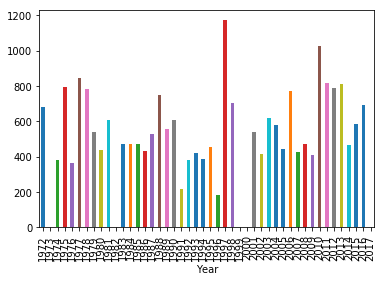

In [558]:
yearly_rainfall_total.plot.bar()

That works for quick looks at data, but the figure is pretty basic and the formatting is ugly. Also, because this data is stored in a `Series` object, pandas is plotting each value with a different color. We can force the colors to all be the same default blue by coercing the `Series` into a `DataFram` object and plotting that instead. 

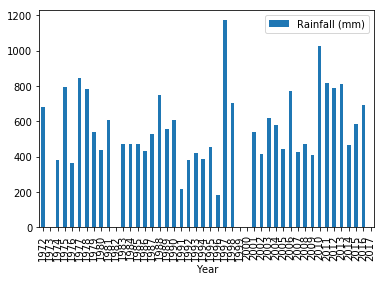

In [559]:
pd.DataFrame(yearly_rainfall_total).plot.bar()

This provides consistent color and dumps a legend in for good measure. We're lucky that our column name includes units, or else we'd still have no idea what the y-axis values meant. Also, our x-axis is hopelessly crowded with labels. 

<div class="alert alert-warning">In general, pandas built-in plotting functions aren't very useful for anything other than basic data exploration. For more advanced plotting, it's best to use matplotlib's **pyplot** library.
</div>




### Plotting with matplotlib

Like `pandas` and `numpy`, `matplotlib.pyplot` has its own shortname that we use on import, `plt`

In [560]:
import matplotlib.pyplot as plt

Let's plot the monthly patterns of rainfall at this site. We can do this by re-organizing our data, aggregating by `Month` and then `Year` instead of `Year` first:

In [561]:
monthly_data = df.groupby(['Month', 'Year'])['Rainfall (mm)'].sum()
monthly_data.head()

Month  Year
1      1972    0.000
       1973    0.000
       1974    3.048
       1975    0.000
       1976    0.000
Name: Rainfall (mm), dtype: float64

We see that the data is now organized by month (starting with month `1`), and each year's monthly total is given for each month (starting in `1972`, the first year of data). This structure of data is called a `MultiIndex`, and we generate these `MultiIndex` objects using the groupby() command. In the case of the `monthly_data` object, there are two `levels` of indicies, the `Month` and the `Year`. We refer to the `Month` as the 1st index, and the `Year` as the second index. We can access the index values of a `MultiIndex` using the **get_level_values()** function. Because the index values repeat for each year, we use **unique()**. 

In [562]:
months = monthly_data.index.get_level_values(0).unique()

We can quickly get the mean rainfall in each month, as well as the standard deviation of rainfall for each month using _list comprehension_ notation. This is a fun python tool that allows you to generate lists as single lines of code, rather than having to write out a `for` loop. 

<div class="alert alert-info">List comprehension is a tool that takes time to use well. But whenever you start to write a `for` loop in python, you should check to see if a list comprehension might do the trick instead.</div>

In [563]:
mean_by_month = [monthly_data[i].mean() for i in months]
mean_by_month

[23.130933333333328,
 12.534347826086957,
 26.87982608695652,
 90.01539130434784,
 90.45713043478261,
 30.082434782608694,
 49.304222222222215,
 47.16497777777778,
 29.68977777777778,
 49.405822222222234,
 55.084133333333334,
 30.671911111111115]

<div class="alert alert-success">**DIY Code:** Create an array called `std_by_month` that contains the standard deviation of monthly rainfall</div> 

In [564]:
# This cell intentionally left blank

Now that we have a list of monthly means and a list of monthly standard deviations, we can make a bar plot with error bars using `matplotlib`.

Text(0.5,1,'Pattern of monthly rainfall, Mpala Research Center, Kenya, 1972-2017')

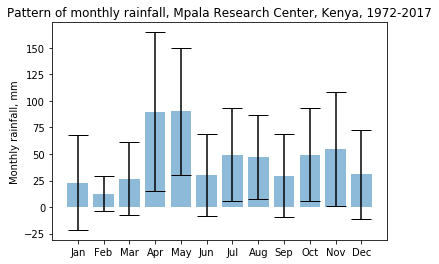

In [565]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x_pos = np.arange(len(months))

fig, ax = plt.subplots()

ax.bar(x_pos, mean_by_month, yerr=std_by_month, align='center', alpha=0.5, ecolor='black', capsize=10)

ax.set_xticks(x_pos)
ax.set_xticklabels(months)
ax.set_ylabel('Monthly rainfall, mm')
ax.set_title('Pattern of monthly rainfall, Mpala Research Center, Kenya, 1972-2017')


A lot just happened. Let's look at it line by line.

```python
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x_pos = np.arange(len(months))
```
These lines set up the x-axis labels. We specified the labels in the `months` variable, and then used then used the **np.arrange()** function to create a list of x-axis values where we wanted the labels to appear.

```python
fig, ax = plt.subplots()
```
This line simply initialized a new plot and created two new variables, `fig` and `ax`. `fig` holds information about the figure (which contains the plot, or multiple subplots), and `ax` holds information about the plot itself.

```python
ax.bar(x_pos, mean_by_month, yerr=std_by_month, align='center', alpha=0.5, ecolor='black', capsize=10)
```
This line is where the plot actually gets created. We use the **bar()** function, which is a method of the `ax` object, because we want a bar chart, and then we specify the x-axis values as `xpos`, the y-axis values as `mean_by_month`, and the `yerr` bars as `std_by_month`. The rest of the arguments determine style and formatting of the plot.

There's one more improvement to make in the plot. Because the variance in rainfall is so high at this site, it's cleaner to display the error bars as extending only upward from the means, rather than both up and down. To do this, we can pass in an array of zero length bars in addition to the length of the upward facing bars.

Text(0.5,1,'Pattern of monthly rainfall, Mpala Research Center, Kenya, 1972-2017')

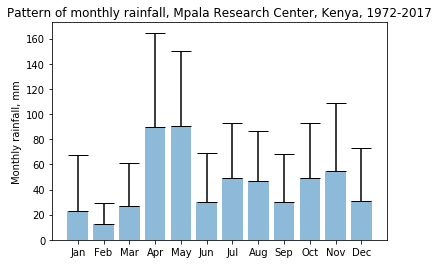

In [566]:
fig, ax = plt.subplots()

ax.bar(x_pos, mean_by_month, yerr=[[0]*12, std_by_month], align='center', alpha=0.5, ecolor='black', capsize=10)

ax.set_xticks(x_pos)
ax.set_xticklabels(months)
ax.set_ylabel('Monthly rainfall, mm')
ax.set_title('Pattern of monthly rainfall, Mpala Research Center, Kenya, 1972-2017')

## Quantifying rainfall variability

We can use the [coefficient of variation](https://en.wikipedia.org/wiki/Coefficient_of_variation) to describe rainfall variability. The coefficient of variation, $CV$, of a distribution is the ratio of the standard deviation, $\sigma$, to the mean, $\mu$. We can calculate the population CV of a sample, $\widehat{CV}$, as the ratio of standard deviation of the sample, $s$, and the sample mean, $\bar{x}$:

$$ \widehat{CV} = \frac{s}{\bar{x}} $$ 

Let's look at the distribution of our annual rainfall data.

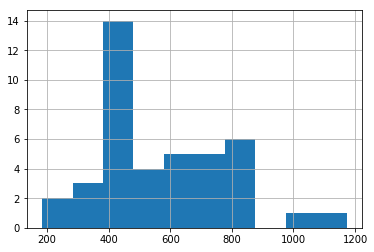

In [567]:
yearly_rainfall_total.hist()

Yikes. We have a very pronounced mode, with a large degree of variation. Let's calculate the $\widehat{CV}$.

<div class="alert alert-success">✏️ **DIY Code:** Calculate the $\widehat{CV}$ for the data in `yearly_rainfall_total`</div>

In [568]:
# This cell intentionally left blank.

$\widehat{CV}$ has some problems dealing with small sample sizes and tends to be biased low. We can create an unbiased estimator, $\widehat{CV}^{*}$ using the following function${^1}$:

$$ \widehat{CV}^{*} = \left(1 + \frac{1}{4n}\right)\widehat{CV} $$

<div class="alert alert-success">✏️ **DIY Code:** Calculate the unbiased estimator, $\widehat{CV}^{*}$, for our rainfall data.</div> 

${^1}$ _technically, $\widehat{CV}^{*}$ is only valid for normally-distributed data, but we will use it anyway as an example._

In [569]:
# This cell intentionally left blank.

## Examining daily rainfall statistics

As we see from the analysis of yearly and monthly rainfall, the climatology of this location is characterized by a fairly high degree of variability. The same is true of many tropical drylands.

### 1. What is the chance that it will rain?
In order to get at the rainfall process itself, let's look at the distribution of rainfall events. We can find all the days of rainfall by simply filtering our `DataFrame` to find days when rain was greater than zero. To do this, we can use the **loc()** function.

We determine both the number of rainy days, and the total number of observed days (we want to ignore days with `nan` values).

In [570]:
rainy_days = df.loc[ (df['Rainfall (mm)'] > 0) ]
total_days = df.loc[ (df['Rainfall (mm)'] >= 0) ]

print("There were {n} rainy days out of {t} total measured days.".format(
    n=len(rainy_days),
    t=len(total_days)
    ))

There were 2081 rainy days out of 15751 total measured days.


Over the entire time period, the probability of rainfall was about 13%, which means that it rains - on average - a little less than once per week (approximately every 7.7 days). From the monthly data on rainfall that we plotted above, it's pretty clear that the movement of the ITCZ across the tropics causes changes in the likelihood of rainfall from month to month.

<div class="alert alert-success">✏️ **DIY Code:** Determine the probability of rainfall for each month. **Hint**: You can combine test criteria using logical operators (i.e. `&` and `|`).</div>

In [571]:
rainy_days_by_month = []
total_days_by_month = []
rainfall_probability_by_month = []

# The rest of this cell intentionally left blank

### 2. What is the amount that it will rain?

We've already subsetted all of our data for days with rain and stored this in the variable `rainy_days`. Let's look at the distribution of rain amounts:

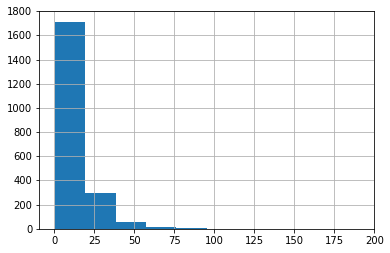

In [572]:
rainy_days['Rainfall (mm)'].hist()

As opposed to the annual rainfall distribution, the distribution of daily storm totals (or daily rainfall) has a much clearer distribution. This pattern of daily rainfall - a short-tailed distribution with is _very_ consistent with what we see across tropical drylands, and even more broadly across any location where rainfall is dominated by convective processes. We might ask what the average storm total is...

<div class="alert alert-success">✏️ **DIY Code:** Calculate the average amount of rainfall on rainy days</div>

In [573]:
# This cell intentionally lefy blank.

### 3. Will it rain tomorrow?

Finally, we want to look to see if we can predict rainfall. The easiest way to think about predictability is to ask whether or not knowing what happened today significantly alters our expectation about what will happen tomorrow. There are two options:

1. If every day is random and unpredictable, then rainfall tomorrow will be independent of what happened today.
2. If what happens today affects tomorrow, then we should see dependency between today and tomorrow's rainfall.

We can test the independence of rainfall likelihood by testing to see if rainfall on day $t$ affects the probability of rainfall on day $t+1$. 

Formally, we can write the probability that rainfall, $R$, on some day $t$,is greater than zero as $P[R_t>0]$. If $ P[R_t>0] = P[R_t>0 | R_{t-1} >0] $, then we can say that $P[R_t]$ and $P[R_{t-1}] are independent.

First, we use the **index** property of `rainy_days`, which is just a list of all the index values (or rows) in our original data, `df`, where rainfall was greater than zero. Then we increment the index and save all these rows from the original data into a new variable, `days_after_rain`.

In [574]:
idx = rainy_days.index
days_after_rain = df.loc[idx + 1]

We now have two lists of days, `rainy_days` and `days_after_rain`. 

<div class="alert alert-success">✏️ **DIY Code:**: Determine if the probability of rainfall increases on days following rainy days.</div>

In [575]:
# This cell intentionally left blank.

## ✅ End of Chapter 1

We're done with the first chapter. It's been a whirlwind, but hopefully you've learned:

* How to **get information** about dataframes
* How to use `groupby` and **method chaining** to transform and aggregate rainfall data
* Some basic tools for plotting rainfall data
* How to filter data based on column values using the **loc** command
* Some basics of exploring daily rainfall patterns

## What's Next

Next we are going to explore daily data a little more and learn how to simluate rainfall as a stochastic process. We will also get to explore a much larger dataset of rainfall from the Laikipia region of Kenya, covering 80 stations and going back to 1934.

[Return to top](#top)